In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [73]:
data = pd.read_csv("train_v9rqX0R.csv")

In [61]:
test = pd.read_csv("test_AbJTz2l.csv")

# Summary Statistics

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Missing Values

In [7]:
missing_per_column = data.isnull().sum()
print(missing_per_column)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
total_missing = data.isnull().sum().sum()
print(total_missing)

3873


In [18]:

missing_percentage = data.isnull().mean() * 100


missing_percentage = missing_percentage[missing_percentage > 0]


missing_percentage = missing_percentage.sort_values(ascending=False)

print(missing_percentage)

Outlet_Size    28.276428
Item_Weight    17.165317
dtype: float64


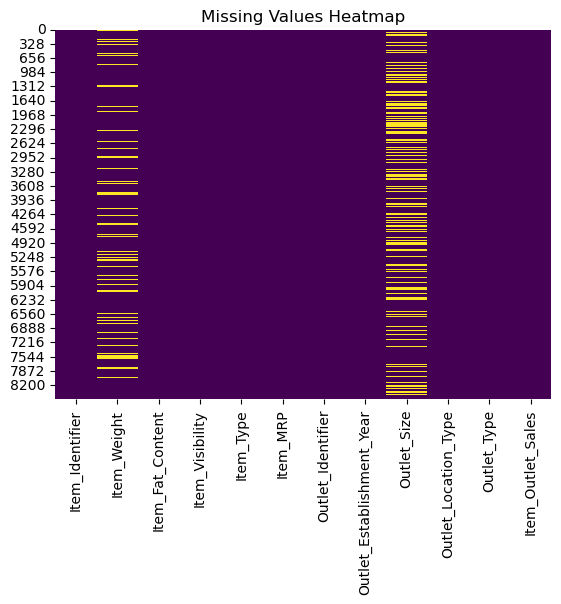

In [17]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis') 
plt.title('Missing Values Heatmap')
plt.show()

# EDA

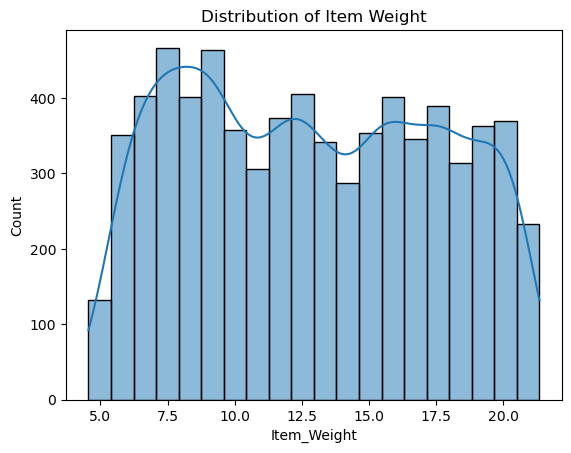

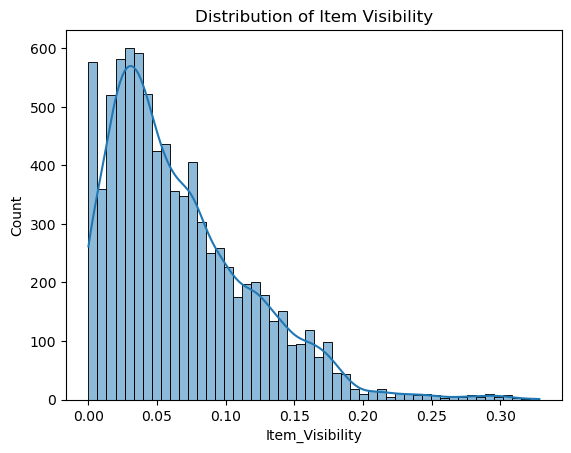

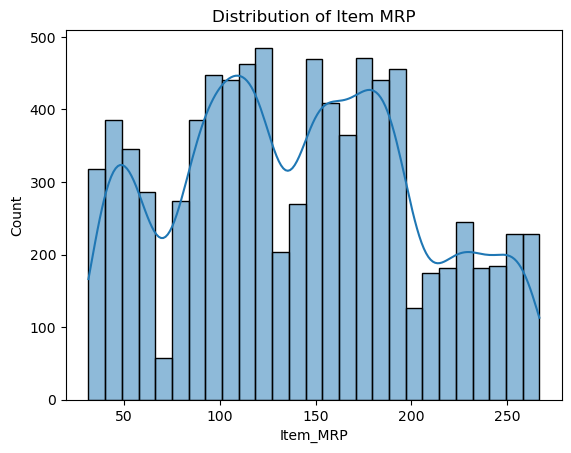

In [20]:

sns.histplot(data['Item_Weight'], kde=True)
plt.title('Distribution of Item Weight')
plt.show()

sns.histplot(data['Item_Visibility'], kde=True)
plt.title('Distribution of Item Visibility')
plt.show()


sns.histplot(data['Item_MRP'], kde=True)
plt.title('Distribution of Item MRP')
plt.show()

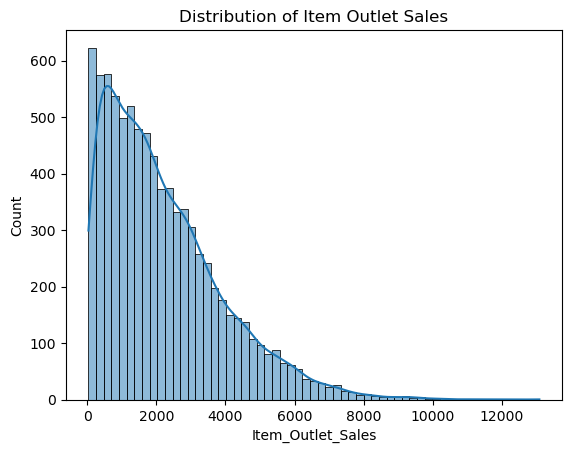

In [22]:

sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.show()

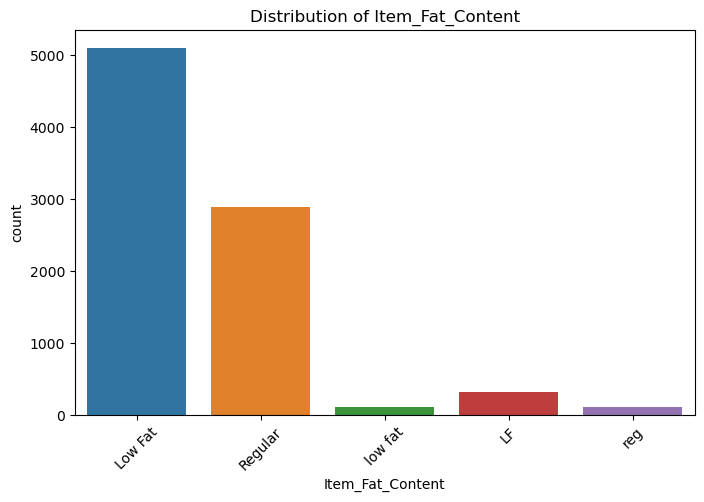

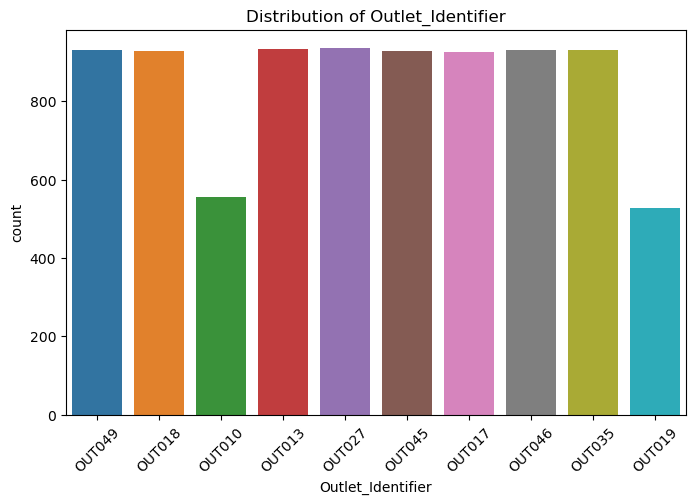

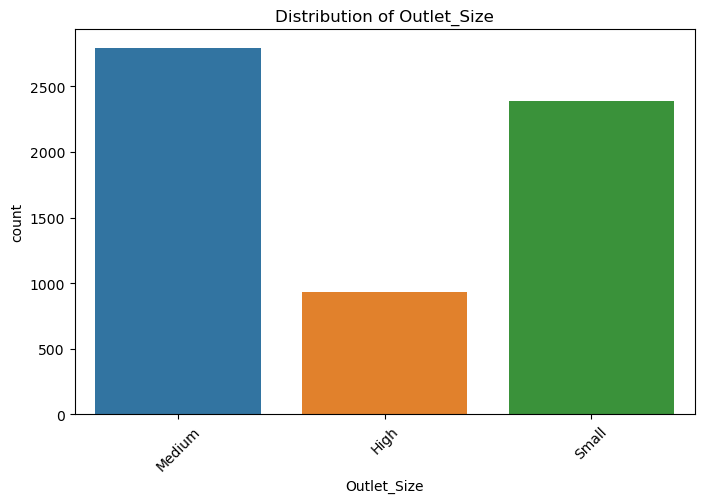

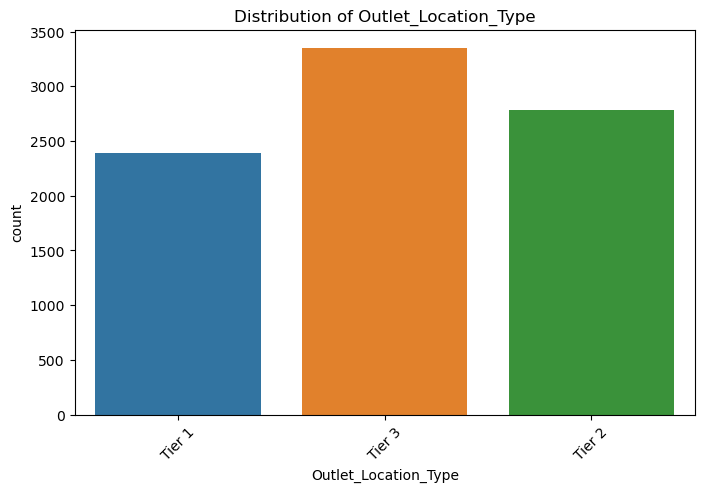

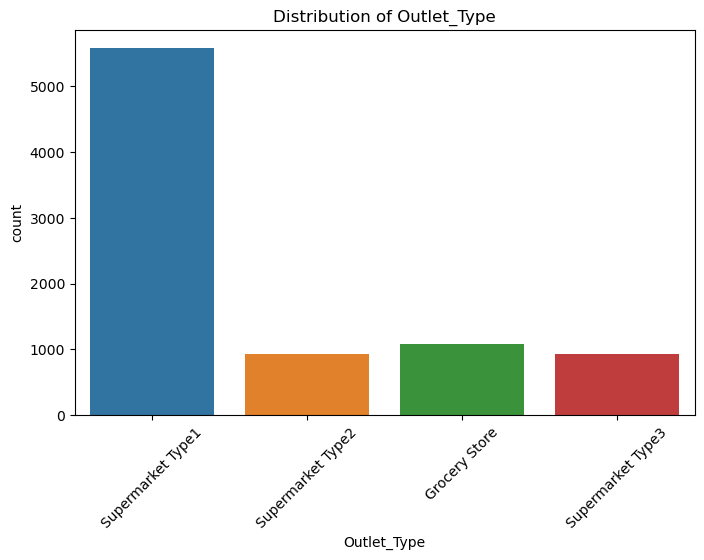

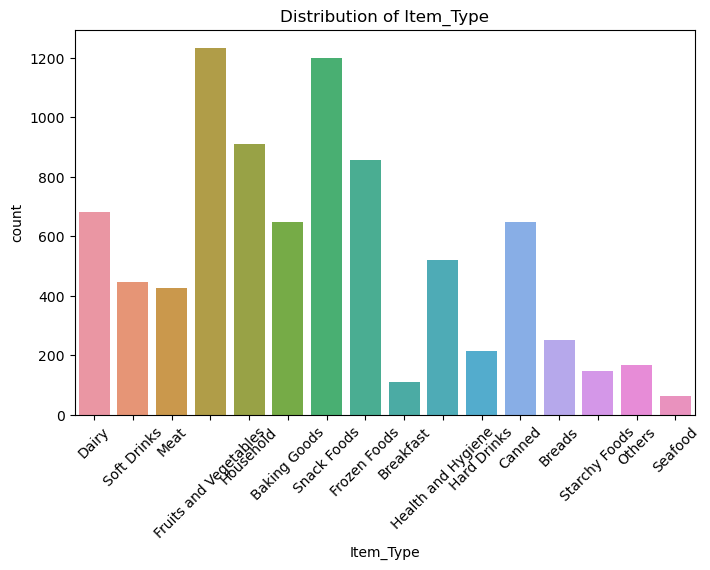

In [23]:
categorical_columns = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 
                       'Outlet_Location_Type', 'Outlet_Type', 'Item_Type']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

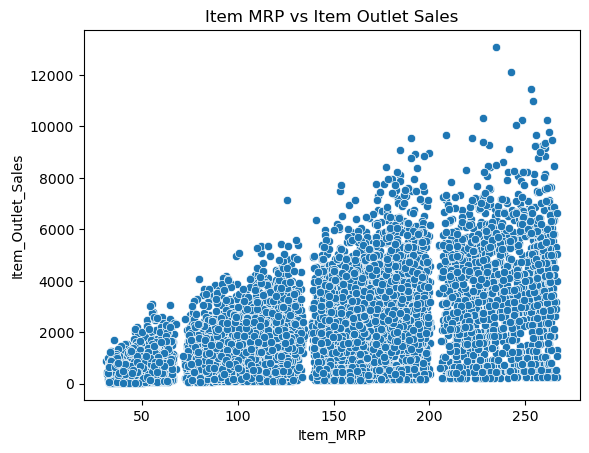

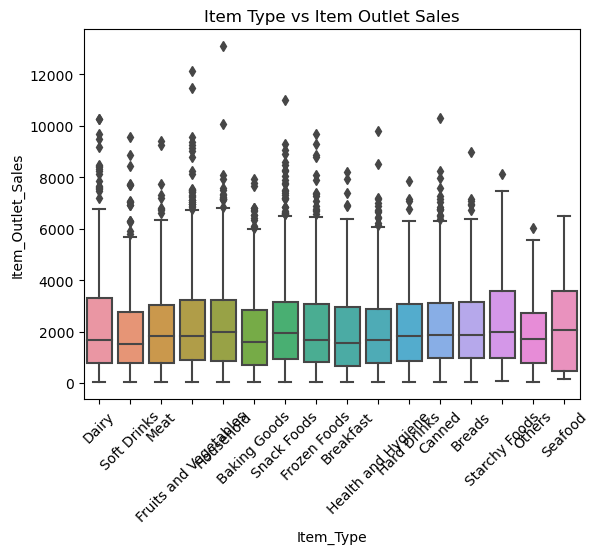

In [24]:

sns.scatterplot(x=data['Item_MRP'], y=data['Item_Outlet_Sales'])
plt.title('Item MRP vs Item Outlet Sales')
plt.show()


sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)
plt.xticks(rotation=45)
plt.title('Item Type vs Item Outlet Sales')
plt.show()

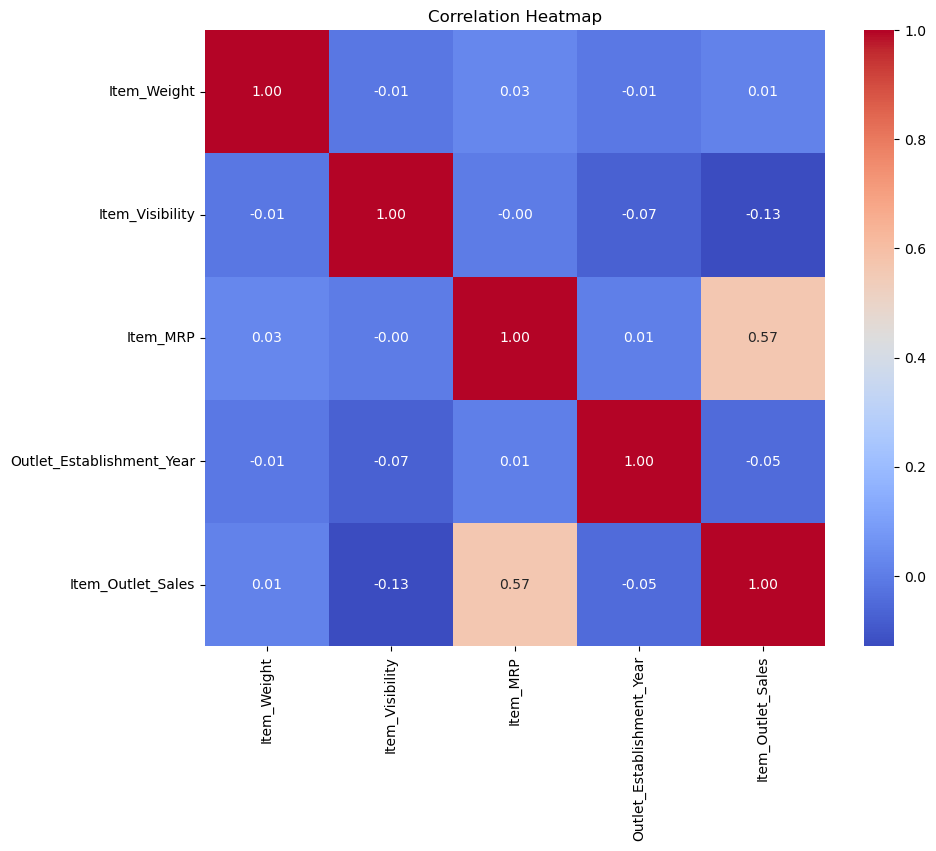

In [28]:

numeric_cols = data.select_dtypes(include=['number']).columns


corr_matrix = data[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

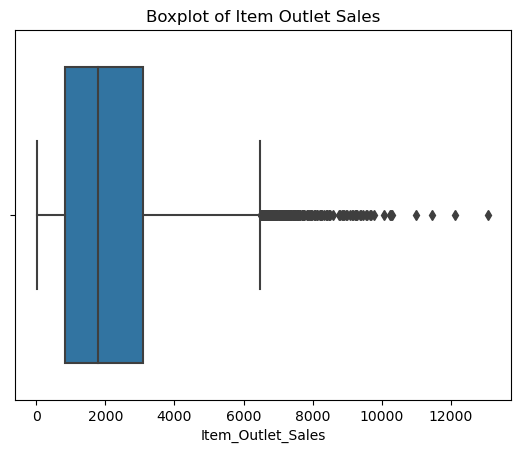

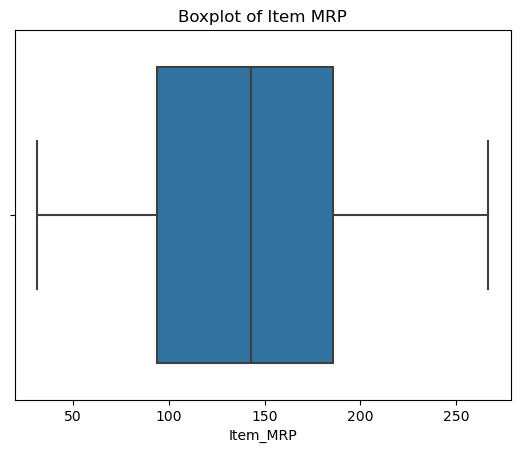

In [27]:

sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Boxplot of Item Outlet Sales')
plt.show()


sns.boxplot(x=data['Item_MRP'])
plt.title('Boxplot of Item MRP')
plt.show()


# Missing value Treatment

<b> Imputing item_weight with mean and unknown for outlet_size since dont want to guess there while also replacing inconsistent values</b>

In [76]:

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)


data['Outlet_Size'] = data['Outlet_Size'].fillna('Unknown')


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [77]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Label Encoding for categorical variables

In [78]:

categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [79]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Setting Target Variables

In [92]:

y = data['Item_Outlet_Sales']


X = data.drop(['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'], axis=1)

In [96]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,3,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


# Models

<b> Linear Regression Base model </b>

In [93]:

model = LinearRegression()


model.fit(X, y)

LinearRegression()

In [94]:
y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Training RMSE:", rmse)

Training RMSE: 1206.6814466961985


<b> Random Forest </b>

In [95]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X, y)


y_pred_rf = rf_model.predict(X)


rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
print("Random Forest Training RMSE:", rmse_rf)

Random Forest Training RMSE: 423.57370837454243


<b> XGB </b>

In [84]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train
xgb_model.fit(X, y)

# Predict
y_pred_xgb = xgb_model.predict(X)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))
print("XGBoost Training RMSE:", rmse_xgb)

XGBoost Training RMSE: 888.6046564327634


<b> LightGBM </b>

In [85]:
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


lgbm_model.fit(X, y)


y_pred_lgbm = lgbm_model.predict(X)


rmse_lgbm = np.sqrt(mean_squared_error(y, y_pred_lgbm))
print("LightGBM Training RMSE:", rmse_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 10
[LightGBM] [Info] Start training from score 2181.288915
LightGBM Training RMSE: 915.2708649650802


<b> CatBoost </b>

In [86]:
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0)


catboost_model.fit(X, y)

y_pred_catboost = catboost_model.predict(X)

rmse_catboost = np.sqrt(mean_squared_error(y, y_pred_catboost))
print("CatBoost Training RMSE:", rmse_catboost)

CatBoost Training RMSE: 1028.1596459202776


# Selecting RF for model building

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Split node parameters
    'min_samples_leaf': [1, 2, 4],    # Leaf node parameters
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X, y)


print("Best Hyperparameters found by GridSearchCV:", grid_search.best_params_)


best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X)


rmse_best_rf = np.sqrt(mean_squared_error(y, y_pred_best_rf))
print("Tuned Random Forest Training RMSE:", rmse_best_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\Ana\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
337 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ana\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ana\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Ana\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Ana\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    ra

Best Hyperparameters found by GridSearchCV: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Training RMSE: 973.3945659587748


In [58]:
param_grid = {
    'n_estimators': [50,100, 150, 200],  # Number of trees (keep it moderate)
    'max_depth': [5,8,10, 15, 20, None],  # Limiting tree depth
    'min_samples_split': [2, 5],      # Simpler split conditions
    'min_samples_leaf': [1, 2],       # Simpler leaf conditions
    'max_features': ['auto', 'sqrt']  # Limited feature choices
}

rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X, y)


print("Best Hyperparameters found by GridSearchCV:", grid_search.best_params_)


best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X)


rmse_best_rf = np.sqrt(mean_squared_error(y, y_pred_best_rf))
print("Tuned Random Forest Training RMSE:", rmse_best_rf)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


D:\Ana\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
333 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ana\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ana\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Ana\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Ana\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    rai

Best Hyperparameters found by GridSearchCV: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Training RMSE: 963.4418973783868


In [60]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],  # Randomly sample training data
    'colsample_bytree': [0.8, 1.0]  # Randomly sample features
}


xgb = XGBRegressor(random_state=42)


grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search_xgb.fit(X, y)


print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)


best_xgb_model = grid_search_xgb.best_estimator_


y_pred_best_xgb = best_xgb_model.predict(X)


rmse_best_xgb = np.sqrt(mean_squared_error(y, y_pred_best_xgb))
print("Tuned XGBoost Training RMSE:", rmse_best_xgb)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Tuned XGBoost Training RMSE: 1048.085719772041


# Test File

<b> Preprocessing (Imputation and Encoding) </b>

In [87]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('Unknown')
test['Item_Weight'] = test['Item_Weight'].fillna(data['Item_Weight'].mean())
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [89]:

categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


le = LabelEncoder()


for col in categorical_cols:
    test[col] = le.fit_transform(test[col])

In [90]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,3,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,3,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,3,1,1
4,FDY38,12.857645,1,0.118599,4,234.2300,5,1985,1,2,3


# Since tuning is not fetching any good results, we shall proceed with the base RF model

In [97]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [98]:
X_test = test.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [99]:
test_predictions = rf_model.predict(X_test)

In [101]:
test_predictions

array([1718.7627  , 1272.137402,  604.71285 , ..., 1770.015984,
       4805.684478, 1552.299384])

In [102]:
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

In [103]:
submission.to_csv('submission.csv', index=False)